# <center> Лабораторная работа № 5</center>
Перед началом выполнения каждой лабораторной работы, необходимо выполнить код в двух ячейках ниже. В случае если модуль `datetime` не установлен нужно установить. В последнем принте, вывести свою фамилию и инициалы.

In [84]:
!whoami

simko


In [85]:
from datetime import datetime

current_time = datetime.now()
print(current_time)
print("Simko S.E.") # написать здесь свою фамилию и инициалы

2022-12-12 18:57:04.560260
Simko S.E.


# Задания

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

**Задание 1.** Создайте любые три датафрейма и объедините их функциями  `pd.concat`, `pd.merge` и `df.join`(т.е. 3-мя способами). Объясните есть ли разница между результатами получеными разными функциями.

In [3]:
df1 = pd.DataFrame({
    1: ["One", "Один", "Un"],
    2: ["Two", "Два", "Deux"],
    3: ["Three", "Три", "Trois"]
})
df2 = pd.DataFrame({
    4: [4**i for i in range(1,4)],
    5: [5**i for i in range(1,4)],
    6: [6**i for i in range(1,4)],
})
df3 = pd.DataFrame({
    7: [7**(1/i) for i in range(2,5)],
    8: [8**(1/i) for i in range(2,5)],
    9: [9**(1/i) for i in range(2,5)]
})

some_concat = pd.concat([df1, df2, df3], axis = 1)

some_merge = pd.merge(
    pd.merge(df1, 
             df2, 
             left_index = True, 
             right_index = True), 
    df3, 
    left_index = True, 
    right_index = True
)

some_join = df1.join(df2.join(df3))

# Разницы между полученными результатами нет, это три идентичных датафрейма.
print(type(some_concat), type(some_merge), type(some_join))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [4]:
some_concat

,1,2,3,4,5,6,7,8,9
0,One,Two,Three,4,5,6,2.645751,2.828427,3.000000
1,Один,Два,Три,16,25,36,1.912931,2.000000,2.080084
2,Un,Deux,Trois,64,125,216,1.626577,1.681793,1.732051


In [5]:
some_merge

,1,2,3,4,5,6,7,8,9
0,One,Two,Three,4,5,6,2.645751,2.828427,3.000000
1,Один,Два,Три,16,25,36,1.912931,2.000000,2.080084
2,Un,Deux,Trois,64,125,216,1.626577,1.681793,1.732051


In [6]:
some_join

,1,2,3,4,5,6,7,8,9
0,One,Two,Three,4,5,6,2.645751,2.828427,3.000000
1,Один,Два,Три,16,25,36,1.912931,2.000000,2.080084
2,Un,Deux,Trois,64,125,216,1.626577,1.681793,1.732051


**Задание 2.** `pd.DataFrame`, замените случайные 10% элементов на пропуски (`np.nan`), а затем добавьте по столбцу для оценок первых 4 моментов кумулятивно — $$\frac{1}{m} \sum\limits_{i=1}^{m} X_i^{k}, \; i \in \overline{1, m}, \; m \in  \overline{1, n}, \; k \in \overline{1, 4}$$ 
Ваша функция должна корректно обрабатывать пропуски. В конце постройте график.

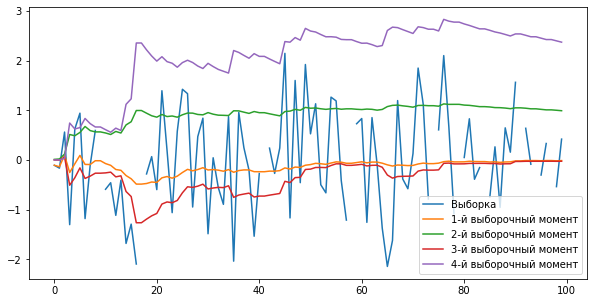

In [13]:
# генерируем выборку
n = 100
sample = sps.norm.rvs(size=n)

# создаем пропуски
index = np.random.choice(np.arange(n), int(0.1 * n), replace=True) # Случайная выборка из значений заданного одномерного массива.
sample[index] = np.nan

# ВАШ КОД
# создайте датафрейм на основе данных выше и задайте название столбцу Выборка 
df = pd.DataFrame({"Выборка": sample})

# ВАШ КОД
for k in range(1, 4 +1):
    df[f'{k}-й выборочный момент'] = (
        df['Выборка'] ** k 
    ).expanding().mean()
    
df.plot(figsize=(10, 5)); # для рисования раскомментируйте строку и добавьте имя вашего датафрейма

In [9]:
df = pd.DataFrame({"B": [2, 1, 2, 5, np.nan, 4]})

In [10]:
df

,B
0,2.0
1,1.0
2,2.0
3,5.0
4,NaN
5,4.0


In [30]:
# пример как работает expanding
df.expanding().sum()

,B
0,2.0
1,3.0
2,5.0
3,10.0
4,10.0
5,14.0


In [104]:
#Функция nanmean() вычисляет среднее арифметическое значений элементов массива, игнорируя значения np.nan.
df.expanding().apply(np.nanmean)

,B
0,2.000000
1,1.500000
2,1.666667
3,2.500000
4,2.500000
5,2.800000


In [106]:
# тот же результат
df.expanding().mean()

,B
0,2.000000
1,1.500000
2,1.666667
3,2.500000
4,2.500000
5,2.800000


**Задание 3.**  Из датафрейма `df_host` ниже, используя функцию `pd.pivot_table` во всех пунктых определите:

3.1. Среднюю зарплату по специальностям.

3.2. У каких специалистов самая высокая средняя зарплата.

3.3. Определите максимальный и минимальный стаж по каждой специальности.

In [9]:
df_host = pd.DataFrame({
    'Специальность' : ['Менеджер', 'Врач', 
                       'Учитель', 'Психолог', 'Повар'] * 6,
    'Специалист' : ['Александр', 'Иван', 'Светлана'] * 10,
    'Стаж' : sps.randint(low=2, high=25).rvs(size=30),
    'Зарплата': sps.randint(low=30000, high=300000).rvs(size=30)
})

df_host

,Специальность,Специалист,Стаж,Зарплата
0,Менеджер,Александр,22,251849
1,Врач,Иван,20,88642
2,Учитель,Светлана,12,269647
3,Психолог,Александр,15,285133
4,Повар,Иван,12,298543
5,Менеджер,Светлана,7,243809
6,Врач,Александр,24,274688
7,Учитель,Иван,5,81654
8,Психолог,Светлана,10,123015
9,Повар,Александр,2,37484


In [23]:
mean_salary_pt = pd.pivot_table(df_host,
                                index = "Специальность",
                                values = "Зарплата",
                                aggfunc = np.mean)
mean_salary_pt.columns = ["Средняя зарплата"]

work_expirience_pt = pd.pivot_table(df_host,
                                    index = "Специальность",
                                    values = "Стаж",
                                    aggfunc = [min, max])

max_salary_pt = pd.pivot_table(df_host,
                               index = "Специальность",
                               values = "Зарплата",
                               aggfunc = max)
max_salary_pt = pd.merge(max_salary_pt, df_host,
                         how = "inner")

In [24]:
# 3.1. Средняя зарплата по специальностям.
mean_salary_pt

,Средняя зарплата
Специальность,
Врач,195354.833333
Менеджер,202651.500000
Повар,159725.666667
Психолог,169892.333333
Учитель,127690.666667


In [25]:
# 3.2. У каких специалистов самая высокая средняя зарплата.
mean_salary_pt[mean_salary_pt["Средняя зарплата"] == max(mean_salary_pt["Средняя зарплата"])]

,Средняя зарплата
Специальность,
Менеджер,202651.5


In [26]:
# 3.3. Максимальный и минимальный стаж по каждой специальности.
work_expirience_pt

,min,max
,Стаж,Стаж
Специальность,,
Врач,9,24
Менеджер,7,24
Повар,2,24
Психолог,6,15
Учитель,5,21


In [27]:
# 3.4. Самый высокооплачиваемый специалист по каждой специальности.
max_salary_pt

,Зарплата,Специальность,Специалист,Стаж
0,274688,Врач,Александр,24
1,267752,Менеджер,Иван,19
2,298543,Повар,Иван,12
3,285133,Психолог,Александр,15
4,269647,Учитель,Светлана,12
